# Imports

In [ ]:
#Ex.5
import os

os.chdir('/home/arog/Documents/GitHub/si/')

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from si.io.csv_file import read_csv
from si.data.dataset import Dataset
from si.decomposition.pca import PCA
from sklearn.decomposition import PCA as SklearnPCA
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [2]:
# Load the Iris dataset
iris_dataset = read_csv('/home/arog/Documents/GitHub/si/datasets/iris/iris.csv', features=True, label=True)

# Print the original data shape and features
print("Original data shape:", iris_dataset.X.shape)
print("Features:", list(iris_dataset.features))

Original data shape: (150, 4)
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


# PCA Implementation

In [3]:
# Initialize and fit PCA
pca = PCA(n_components=2)
pca.fit(iris_dataset)

# Print the mean, components, and explained variance
print("\nMean of the data:\n", pca.mean)
print("\nPrincipal Components:\n", pca.components)
print("\nExplained Variance:\n", pca.explained_variance)
print("\nExplained Variance Ratio:\n", pca.explained_variance_ratio)


Mean of the data:
 [5.84333333 3.054      3.75866667 1.19866667]

Principal Components:
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]

Explained Variance:
 [4.22484077 0.24224357]

Explained Variance Ratio:
 [0.92461621 0.05301557]


In [4]:
# Transform the data with PCA
transformed_data = pca.transform(iris_dataset)

# Print the transformed data shape and features
print("\nTransformed data shape:", transformed_data.shape())
print("Transformed features:", transformed_data.features)


Transformed data shape: (150, 2)
Transformed features: ['PC1', 'PC2']


# Scikit-learn's PCA

In [5]:
# Initialize and fit scikit-learn's PCA
scaler = StandardScaler(with_std=False)
X_scaled = scaler.fit_transform(iris_dataset.X)
sklearn_pca = SklearnPCA(n_components=2)
sklearn_pca.fit(X_scaled)

# Print scikit-learn PCA results
print("\n--- scikit-learn PCA ---")
print("Mean of the data:\n", scaler.mean_)
print("\nPrincipal Components (rows):\n", sklearn_pca.components_)
print("\nExplained Variance:\n", sklearn_pca.explained_variance_)
print("\nExplained Variance Ratio:\n", sklearn_pca.explained_variance_ratio_)


--- scikit-learn PCA ---
Mean of the data:
 [5.84333333 3.054      3.75866667 1.19866667]

Principal Components (rows):
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]

Explained Variance:
 [4.22484077 0.24224357]

Explained Variance Ratio:
 [0.92461621 0.05301557]


In [6]:
# Transform the data with scikit-learn's PCA
sklearn_transformed_data = sklearn_pca.transform(X_scaled)

# Comparison Implementation VS Scikit Learn PCA

Text(0, 0.5, 'PC2')

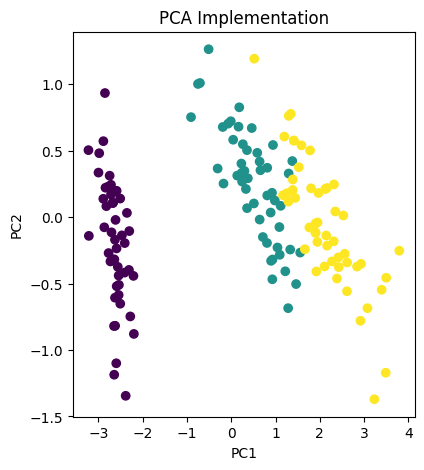

In [7]:
# Visualize the results
plt.figure(figsize=(15, 5))

# Plot PCA transformed data
label_to_num = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_numeric = [label_to_num[label] for label in iris_dataset.y]

plt.subplot(1, 3, 1)
plt.scatter(transformed_data.X[:, 0], transformed_data.X[:, 1], c=y_numeric, cmap='viridis')
plt.title("PCA Implementation")
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

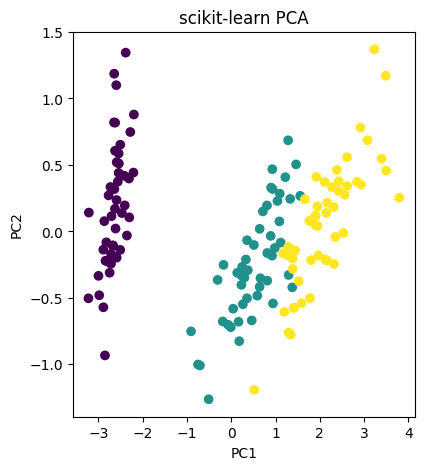

In [8]:
# Plot scikit-learn PCA transformed data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
plt.scatter(sklearn_transformed_data[:, 0], sklearn_transformed_data[:, 1], c=y_numeric, cmap='viridis')
plt.title("scikit-learn PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

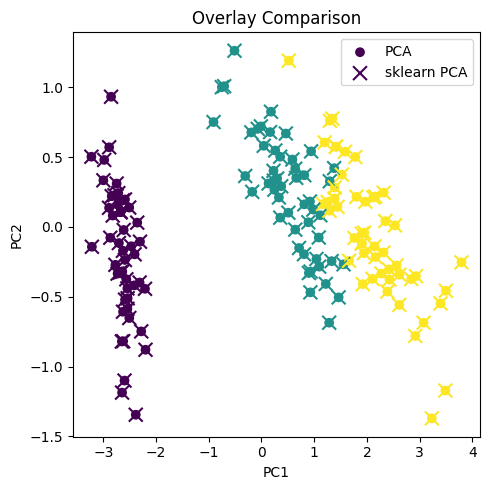

In [9]:
# Set the figure size before creating subplots
plt.figure(figsize=(5, 5)) 

plt.scatter(transformed_data.X[:, 0], transformed_data.X[:, 1], c=y_numeric, cmap='viridis', label='PCA')
plt.scatter(sklearn_transformed_data[:, 0], -sklearn_transformed_data[:, 1], # Negative because sklearn y-axis is inverted
             c=y_numeric, cmap='viridis', marker='x', s=100, label='sklearn PCA') 
plt.title("Overlay Comparison")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

plt.tight_layout()
plt.show()